In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel('Company_Data2015-1-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])


The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [4]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [5]:
Company.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [6]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [7]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [8]:
Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [9]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [10]:
Company[['default','Networth_Next_Year']].head(5)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36


In [11]:
Company[['default','Networth_Next_Year']].tail(5)

,default,Networth_Next_Year
3581,0,72677.77
3582,0,79162.19
3583,0,88134.31
3584,0,91293.70
3585,0,111729.10


In [12]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [13]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [14]:
Company.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [15]:
Company.size

243848

In [16]:
Company.isnull().sum().sum()

118

In [17]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [18]:
Company_X

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [19]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [20]:
((Company_X > UL) | (Company_X < LL)).sum()

APATM_perc[Latest]                 933
Adjusted_PAT                       954
Book_Value_Adj._Unit_Curr          486
Book_Value_Unit_Curr               485
CEPS_annualised_Unit_Curr          602
                                  ... 
Total_Assets_to_Liabilities_       574
Total_Debt                         583
Value_Of_Output                    559
Value_of_Output_to_Gross_Block     481
Value_of_Output_to_Total_Assets    150
Length: 67, dtype: int64

In [21]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [22]:
Company_X.isnull().sum()

Co_Code                            291
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [23]:
Company_X.isnull().sum().sum()

42440

In [24]:
Company_X = Company_X.drop(['Co_Name', 'Networth_Next_Year'], axis = 1)

In [25]:
Company_X.shape

(3586, 65)

In [26]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

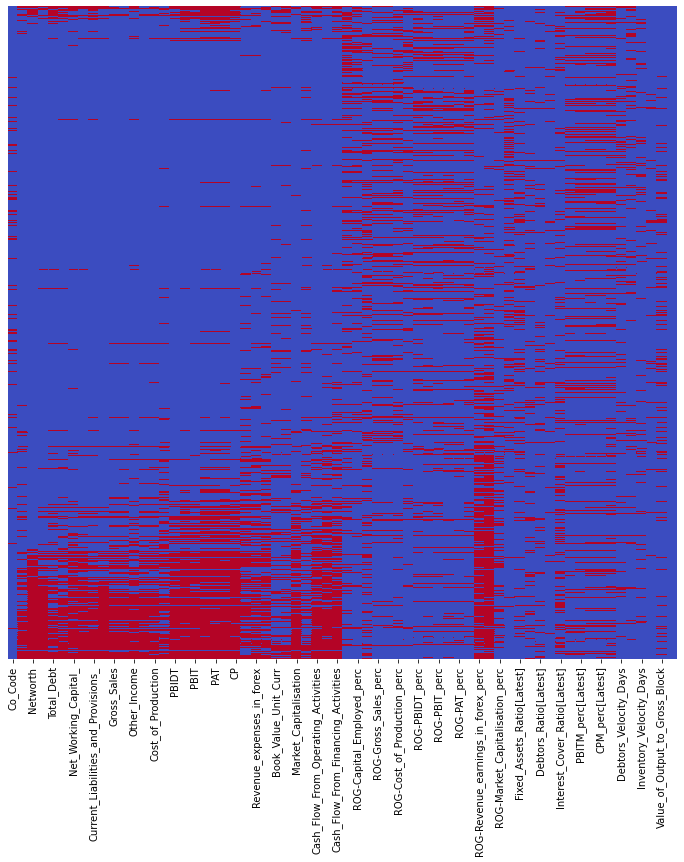

In [62]:
plt.figure(figsize = (12,12))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()


In [28]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [29]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [30]:
Company_sub1_temp.shape

(1179, 66)

In [31]:
Company_sub1_temp['default'].value_counts()

0    1061
1     118
Name: default, dtype: int64

In [32]:
118/388

0.30412371134020616

In [33]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [34]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
                                      ... 
Inventory_Velocity_Days               0.10
Co_Code                               0.08
Total_Asset_Turnover_Ratio[Latest]    0.06
Value_of_Output_to_Total_Assets       0.04
default                               0.00
Length: 66, dtype: float64

In [35]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue_expenses_in_forex_perc', 'ROG-Revenue_earnings_in_forex_perc', 
                             'Cash_Flow_From_Financing_Activities'],
                           axis = 1)

In [36]:
Company_sub2.shape

(3586, 63)

In [37]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [38]:
Company_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3295 non-null   float64
 1   Equity_Paid_Up                       3138 non-null   float64
 2   Networth                             2936 non-null   float64
 3   Capital_Employed                     2990 non-null   float64
 4   Total_Debt                           3003 non-null   float64
 5   Gross_Block_                         3046 non-null   float64
 6   Net_Working_Capital_                 2961 non-null   float64
 7   Current_Assets_                      3009 non-null   float64
 8   Current_Liabilities_and_Provisions_  3005 non-null   float64
 9   Total_Assets_to_Liabilities_         3012 non-null   float64
 10  Gross_Sales                          3032 non-null   float64
 11  Net_Sales                     

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [40]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [41]:
from sklearn.impute import KNNImputer

In [42]:
imputer = KNNImputer(n_neighbors=10)

In [43]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [44]:
Company_imputed.isnull().sum()

Co_Code                            0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
default                            0
Length: 63, dtype: int64

<AxesSubplot:>

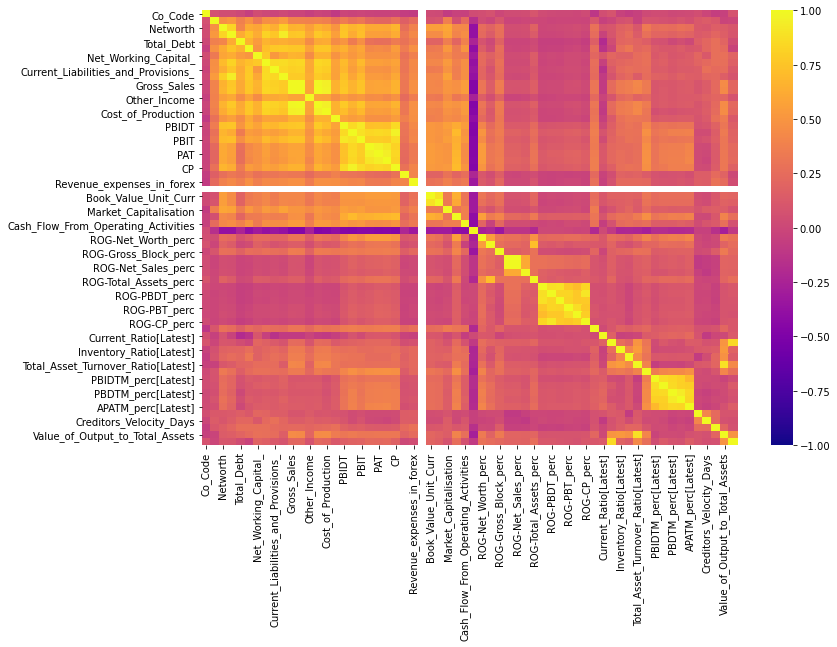

In [45]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [46]:
predictors1 = Company_imputed.drop('default', axis = 1)
response2 = Company_imputed['default']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(predictors1, response2, 
                                                    test_size = 0.33, random_state = 42)

In [49]:
LogR = LogisticRegression(solver='liblinear')

In [50]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [51]:
selector = selector.fit(X_train, y_train)

In [52]:
selector.n_features_

15

In [53]:
selector.ranking_

array([ 7, 42,  1,  1,  1,  1, 28, 15,  1,  1,  1,  6, 11,  1,  1, 33,  1,
        2,  1, 20, 19, 18,  4, 47, 24, 48,  1,  1, 25, 41, 43, 23,  3,  5,
       44, 34, 35, 10, 26, 45, 39, 22, 21, 38, 46, 40,  1, 14, 27, 36, 12,
        1, 32,  8, 29, 31,  9, 30, 17, 16, 13, 37])

In [54]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
2,Networth,1
3,Capital_Employed,1
4,Total_Debt,1
5,Gross_Block_,1
8,Current_Liabilities_and_Provisions_,1
9,Total_Assets_to_Liabilities_,1
10,Gross_Sales,1
13,Value_Of_Output,1
14,Cost_of_Production,1
16,PBIDT,1


# Validating the model on train and test set

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [57]:
print(confusion_matrix(y_train, pred_train))

[[2136   21]
 [ 104  141]]


In [58]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2157
         1.0       0.87      0.58      0.69       245

    accuracy                           0.95      2402
   macro avg       0.91      0.78      0.83      2402
weighted avg       0.95      0.95      0.94      2402



In [59]:
print(confusion_matrix(y_test, pred_test))

[[1022   19]
 [  50   93]]


In [60]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1041
         1.0       0.83      0.65      0.73       143

    accuracy                           0.94      1184
   macro avg       0.89      0.82      0.85      1184
weighted avg       0.94      0.94      0.94      1184



The END!